# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

07d7cfb49d3254841a44d88e77e93cf0


## Generate Cities List

In [32]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Lists to hold data frame variables
temp = []
humidity = []
clouds = []
latitude = []
longitude = []
wind_speed = []
city_name = []
country = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=50)
lngs = np.random.uniform(low=-180.000, high=180.000, size=50)
lat_lngs = zip(lats, lngs)
print(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    
        city = city.replace(' ','%20')
        query_url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid=" + api_key + "&units=imperial"
        print(query_url)
        
        response = requests.get(f'{query_url}').json()
        response

        temp.append(response['main']['temp_max'])
        temp

        humidity.append(response['main']['humidity'])
        humidity

        clouds.append(response['clouds']['all'])
        clouds

        wind_speed.append(response['wind']['speed'])
        wind_speed
        
        latitude.append(response['coord']['lat'])
        latitude
        
        longitude.append(response['coord']['lon'])
        longitude
        
        city_name.append(response['name'])
        city
        
        country.append(response['sys']['country'])
        country

        
        
        time.sleep(2.01)
        
# Print the city count to confirm sufficient count
#len(cities)

[ 52.54044725  -9.11853405 -49.90443638 -63.36358296   8.39861133
 -34.45366754   6.84543061 -14.99368541  61.77413131   2.50998961
 -47.25742617  51.0241925   38.03561077 -77.12430226 -45.52442712
 -75.29432871  32.54227907  61.09797204  -8.70066802 -79.47695023
 -35.41880395 -61.28065549  -6.79275579 -55.38036854  56.95520606
   4.41694935  28.37810035 -37.41283292 -68.54296862 -42.10267343
 -32.9079721   37.6313319   78.4791926  -73.32090922 -84.5266153
 -65.19557879  11.86723276 -66.39287029  28.78624039   6.20490482
   6.2261603  -77.86704565 -86.90350579  12.76188657  89.04853296
  -5.94128268 -26.75913283  46.58408018 -72.70088372  22.90022437] [  27.17253638 -174.24790265   -7.23525414   96.69146    -114.85471777
  -55.16375008  -61.78010923  173.52527757   94.58163312   14.87336169
  -67.27510692   71.80669389  -60.87748481 -123.65613649   99.63108308
   81.61732104  -20.39843707   33.97127618  102.33797763 -120.01739475
  -25.1008883    93.69120828  172.62883386  -63.61351335

KeyError: 'main'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [33]:
### Convert Raw Data to DataFrame
weather_data = {' Max Temperature': temp, 'Humidity': humidity, 'Cloudiness': clouds, 'Wind Speed': wind_speed, 'City Name': city_name, 'Country': country, 'Latitude': latitude, 'Longitude': longitude}
weather_data_df = pd.DataFrame(weather_data)
weather_data_df.head()

#* Export the city data into a .csv.

#* Display the DataFrame

,Max Temperature,Humidity,Cloudiness,Wind Speed,City Name,Country,Latitude,Longitude
0,32.14,90,100,10.09,Salihorsk,BY,52.79,27.54


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [34]:
# Scatterplot 1
plt.scatter(weather_data_df["Latitude"], weather_data_df["Max Temperature"], color = "r", marker="o")

plt.xlabel = ("Latitude")
plt.ylabel = ("Max Temperature (F)")
plt.title = ("Latitude vs. Temperature")
plt.legend(loc='upper left')
plt.grid(True)

plt.show()
#plt.savefig("Latitude_vs_Temperature.png")

KeyError: 'Max Temperature'

#### Latitude vs. Humidity Plot

No handles with labels found to put in legend.


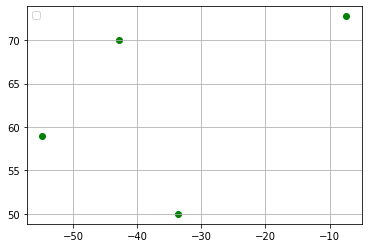

<Figure size 432x288 with 0 Axes>

In [19]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Max Temperature"], color = "g", marker="o")

plt.xlabel = ("Latitude")
plt.ylabel = ("Max Temperature (F)")
plt.title = ("Latitude vs. Temperature")
plt.legend(loc='upper left')
plt.grid(True)

plt.show()
plt.savefig("lat_vs_hum.png")

#### Latitude vs. Cloudiness Plot

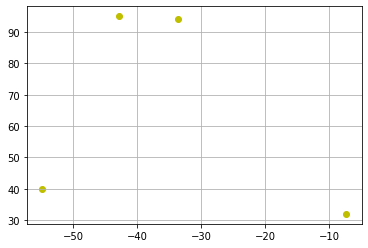

<Figure size 432x288 with 0 Axes>

In [20]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Cloudiness"], color = "y", marker="o")

plt.xlabel = ("Latitude")
plt.ylabel = ("Cloudiness")
plt.title = ("Latitude vs. Cloudiness")
plt.grid(True)

plt.show()
plt.savefig("lat_vs_cloud.png")

#### Latitude vs. Wind Speed Plot

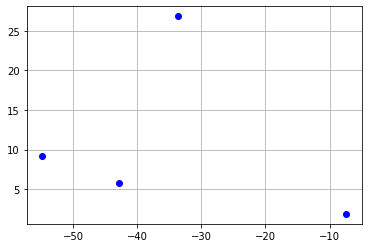

<Figure size 432x288 with 0 Axes>

In [27]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Wind Speed"], color = "b", marker="o")

plt.xlabel = ("Latitude")
plt.ylabel = ("Wind Speed")
plt.title = ("Latitude vs. Wind Speed")
plt.grid(True)

plt.show()
plt.savefig("lat_vs_wind.png")